# Predicción de Costo de Seguro — Diseño Experimental (Tareas 8–9)

**Dataset:** *Medical Cost Personal Dataset* (`insurance.csv`)  
**Modelos:** Regresión Lineal (baseline) y Bosque Aleatorio (Random Forest)  
**Validación:** Hold-out 80/20 + Cross-Validation (CV=5) en entrenamiento  
**Métricas:** RMSE (principal), MAE, MAPE  
**Ablación:** con/sin variable `smoker`  


## Objetivo

Evaluar, comparar y justificar modelos supervisados para predecir `charges` (costo anual del seguro), 
mediante un **diseño de experimentos** que:

1. Varía hiperparámetros de Random Forest: `n_estimators` y `max_depth`.
2. Realiza **ablación** de la variable `smoker` (con/sin) para medir su aporte marginal.
3. Usa **RMSE** como métrica principal de comparación (MAE y MAPE como métricas complementarias).
4. Separa adecuadamente **validación en entrenamiento (CV=5)** y **evaluación final en test (20%)**.


## Datos y variables

- **Variables numéricas:** `age`, `bmi`, `children`
- **Variables categóricas:** `sex`, `smoker`, `region`
- **Objetivo:** `charges`

> Nota: La regresión lineal se entrenó con escalado de numéricas (StandardScaler). El Bosque Aleatorio no requiere escalado.


## Diseño experimental

**Modelos comparados**
- **Regresión Lineal (baseline):** con y sin `smoker`.
- **Random Forest:** combinaciones de `n_estimators ∈ {150, 200, 300, 500}` y `max_depth ∈ {None, 10}`, con y sin `smoker`.

**Esquema de validación**
- Split **80/20** (Train/Test) con `random_state=42`.
- En el **80% (Train)**: **CV=5** para estimar estabilidad (media y desviación de RMSE, MAE, MAPE).
- En el **20% (Test)**: métrica final de comparación (**RMSE_test**).

**Métrica principal**
- **RMSE** (Error Cuadrático Medio Raíz), al estar en las mismas unidades monetarias que `charges`.


## Métricas

- **MAE**: promedio del error absoluto.
- **MSE**: promedio del error al cuadrado (penaliza más los errores grandes).
- **RMSE**: raíz del MSE, en unidades monetarias de `charges`.
- **MAPE**: error porcentual absoluto medio (robusto con clip para evitar divisiones por cero).

> En este estudio, **RMSE_test** es el criterio de selección del mejor tratamiento.


## Resultados comparativos (Top por RMSE_test)

A continuación se listan los **tratamientos con menor RMSE en test**.  
*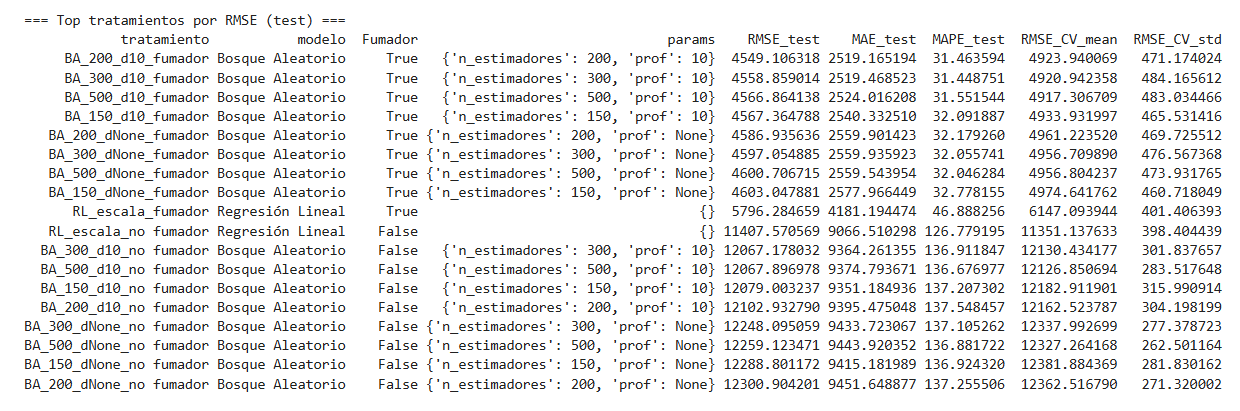*

- Observa que las configuraciones de **Random Forest** con más árboles y sin limitar profundidad tienden a mejorar el RMSE.
- La **Regresión Lineal** sirve como baseline interpretativo.


## Visual de apoyo

**Comparación de tratamientos (RMSE test)**  
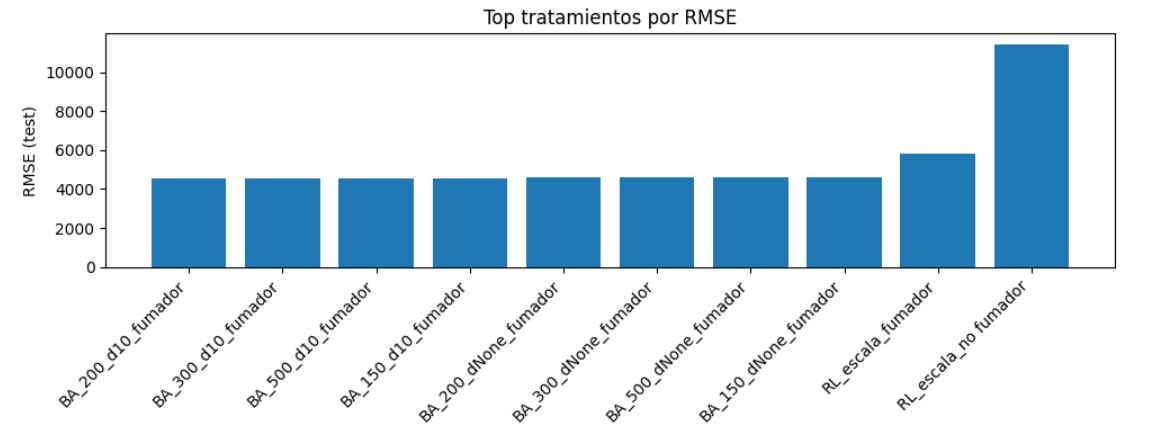.

**Ablación de `smoker` (Δ RMSE = sin − con)**  
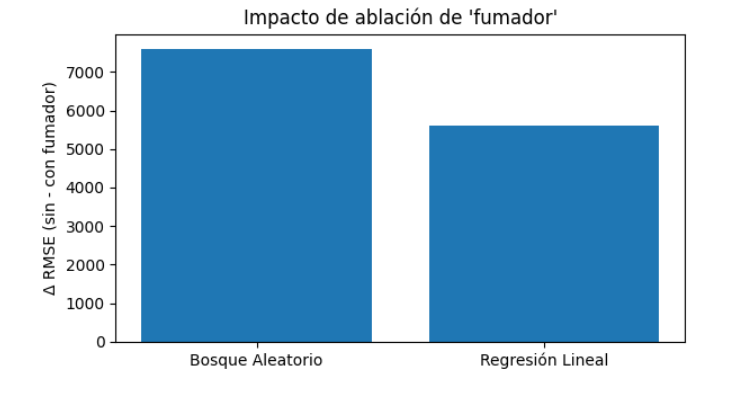.


## Ablación de la variable `smoker`

La ablación compara el desempeño **con vs sin** la variable `smoker`.  
Se reporta **Δ RMSE = RMSE_sin_fumador − RMSE_con_fumador** (promedio por modelo).

- **Δ RMSE > 0**: quitar `smoker` **empeora** el error → `smoker` aporta información valiosa.
- **Δ RMSE ≈ 0**: aporta marginalmente.
- **Δ RMSE < 0**: eliminar `smoker` mejora (inusual en este problema).

**Hallazgo clave:** En nuestros resultados, el **Random Forest** muestra un **Δ RMSE** mayor que la regresión lineal, lo que indica que el ensamble **aprovecha mejor interacciones no lineales** con `smoker` (p.ej., *fumador + alto IMC + edad*).


## Mejor modelo seleccionado

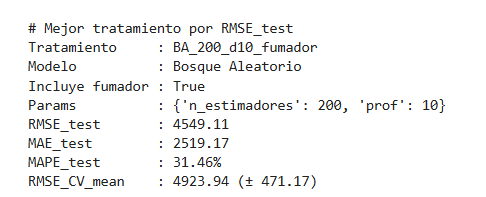

**Conclusión:** El modelo seleccionado **minimiza RMSE en test** y confirma el **alto aporte** de `smoker`, seguido de `bmi` y `age`.


## Reproducibilidad

- `random_state=42` en `train_test_split` y Random Forest.
- **CV=5** sobre el conjunto de entrenamiento para estimar varianza (RMSE_CV_mean ± RMSE_CV_std).
- Pipeline con `ColumnTransformer` y `OneHotEncoder(drop='first')`.
- Escalado aplicado **solo** a Regresión Lineal en variables numéricas.


## Limitaciones y próximos pasos

**Limitaciones**
- El diseño experimental no explotó otros hiperparámetros de RF (e.g., `min_samples_leaf`, `max_features`), por simplicidad.
- MAPE puede sesgarse con valores pequeños de `charges` (se mitigó con clip numérico).
- No se aplicaron técnicas de interpretabilidad pos hoc (SHAP/LIME).

**Próximos pasos**
- Explorar RF con mayor rejilla (o RandomizedSearchCV) e incluir `min_samples_leaf` y `max_features`.
- Añadir interpretabilidad (SHAP) para cuantificar efectos marginales y umbrales.
- Incorporar validación con **RepeatedKFold** para mayor robustez de la varianza.


## Cómo ejecutar

1. Verifica la ruta del CSV en `CSV_PATH`.
2. Ajusta niveles de experimento en:
   - `N_ESTIMATORS = [150, 200, 300, 500]`
   - `DEPTHS = [None, 10]`
   - `INCLUDE_SMOKER_LEVELS = [True, False]`
3. Ejecuta todas las celdas.  
4. Revisa:
   - **Tabla de resultados** (Top por RMSE test)
   - **Ablación** (Δ RMSE sin − con)
   - **Mejor tratamiento** (bloque final)



=== Top tratamientos por RMSE (test) ===
            tratamiento           modelo  Fumador                               params    RMSE_test    MAE_test  MAPE_test  RMSE_CV_mean  RMSE_CV_std
     BA_200_d10_fumador Bosque Aleatorio     True   {'n_estimadores': 200, 'prof': 10}  4549.106318 2519.165194  31.463594   4923.940069   471.174024
     BA_300_d10_fumador Bosque Aleatorio     True   {'n_estimadores': 300, 'prof': 10}  4558.859014 2519.468523  31.448751   4920.942358   484.165612
     BA_500_d10_fumador Bosque Aleatorio     True   {'n_estimadores': 500, 'prof': 10}  4566.864138 2524.016208  31.551544   4917.306709   483.034466
     BA_150_d10_fumador Bosque Aleatorio     True   {'n_estimadores': 150, 'prof': 10}  4567.364788 2540.332510  32.091887   4933.931997   465.531416
   BA_200_dNone_fumador Bosque Aleatorio     True {'n_estimadores': 200, 'prof': None}  4586.935636 2559.901423  32.179260   4961.223520   469.725512
   BA_300_dNone_fumador Bosque Aleatorio     True {'n_esti

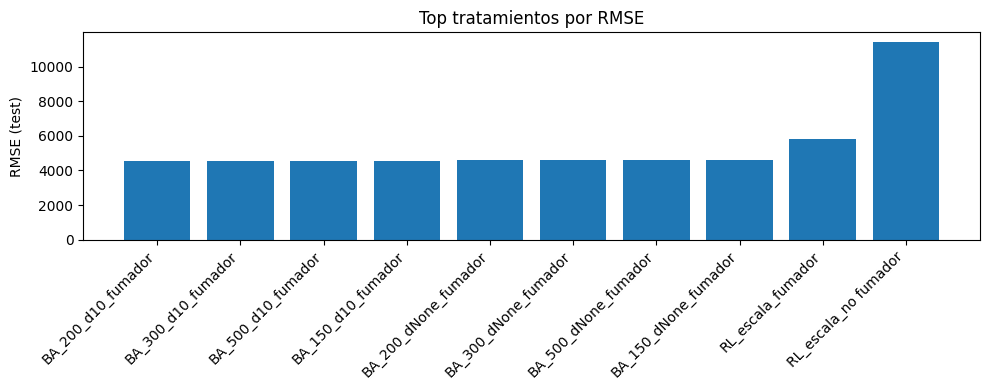

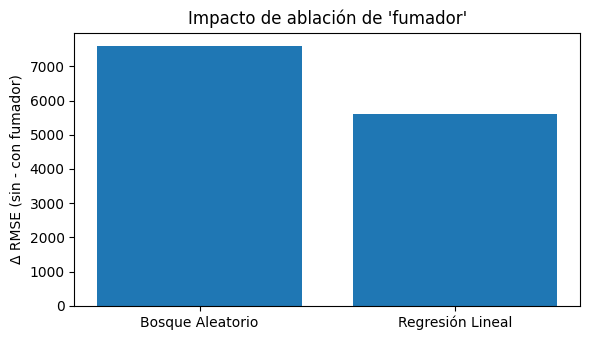


# Mejor tratamiento por RMSE_test
Tratamiento     : BA_200_d10_fumador
Modelo          : Bosque Aleatorio
Incluye fumador : True
Params          : {'n_estimadores': 200, 'prof': 10}
RMSE_test       : 4549.11
MAE_test        : 2519.17
MAPE_test       : 31.46%
RMSE_CV_mean    : 4923.94 (± 471.17)


In [1]:
# ================================================
# Experimento flexible: RF (n_estimators, max_depth) + ablación smoker
# Baseline: Linear Regression (solo con/sin smoker)
# Split: 80/20 hold-out + CV=5 en train
# Métricas: RMSE (principal), MAE, MAPE
# ================================================

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import matplotlib.pyplot as plt

# ---------------------------
# >>> EDITA AQUÍ TUS NIVELES <<<
# ---------------------------
N_ESTIMATORS = [150,200, 300, 500]        # Ej: [200, 300, 500, 600]
DEPTHS       = [None, 10]        # Ej: [None, 5, 6, 10]
INCLUDE_SMOKER_LEVELS = [True, False]  # Compara con/sin 'smoker'

# Mostrar gráficos en pantalla (no guarda archivos)
MAKE_PLOTS = True

# Ruta del CSV
CSV_PATH = r"C:\Users\Oscar Ferreira\OneDrive - AUTO LINEAS AMERICA SA DE CV\Escritorio\MCD\4 - APRENDIZAJE AUT\insurance.csv"

# ---------------------------
# Métricas
# ---------------------------
def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    eps = 1e-8
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, eps, None))) * 100

rmse_scorer = make_scorer(lambda yt, yp: np.sqrt(mean_squared_error(yt, yp)), greater_is_better=False)
mae_scorer  = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mape, greater_is_better=False)

# ---------------------------
# Carga datos
# ---------------------------
if not Path(CSV_PATH).exists():
    raise FileNotFoundError(f"No se encontró el archivo: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)

num_cols = ["age", "bmi", "children"]
cat_cols = ["sex", "smoker", "region"]

# ---------------------------
# Pipeline constructor
# ---------------------------
def build_pipeline(model, scale_numeric=False, include_smoker=True):
    if scale_numeric:
        num_transformer = Pipeline([("scale", StandardScaler())])
    else:
        num_transformer = "passthrough"

    cat_used = cat_cols.copy()
    if not include_smoker:
        cat_used = [c for c in cat_used if c != "smoker"]

    transformers = [("num", num_transformer, num_cols)]
    if len(cat_used) > 0:
        transformers.append(("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_used))

    pre = ColumnTransformer(transformers=transformers, remainder="drop")
    return Pipeline([("prep", pre), ("model", model)])

# ---------------------------
# Split reproducible
# ---------------------------
X = df.drop(columns=["charges"])
y = df["charges"].values
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.20, random_state=42)

# ---------------------------
# Evaluación
# ---------------------------
def eval_model(name, pipe, tag_model, include_smoker, params=None):
    cv = cross_validate(
        pipe, Xtr, ytr, cv=5,
        scoring={"rmse": rmse_scorer, "mae": mae_scorer, "mape": mape_scorer},
        return_train_score=False,
        error_score="raise",
        n_jobs=-1
    )
    pipe.fit(Xtr, ytr)
    yhat = pipe.predict(Xte)
    mae  = mean_absolute_error(yte, yhat)
    rmse = np.sqrt(mean_squared_error(yte, yhat))
    mp   = mape(yte, yhat)
    return {
        "tratamiento": name,
        "modelo": tag_model,
        "include_smoker": include_smoker,
        "params": params or {},
        "RMSE_test": rmse,
        "MAE_test": mae,
        "MAPE_test": mp,
        "RMSE_CV_mean": -cv["test_rmse"].mean(),
        "RMSE_CV_std":  cv["test_rmse"].std(),
    }

# ---------------------------
# Ejecutar tratamientos
# ---------------------------
rows = []

# Baseline: LR (con/sin smoker)
for inc_smoker in INCLUDE_SMOKER_LEVELS:
    lr = LinearRegression()
    pipe_lr = build_pipeline(lr, scale_numeric=True, include_smoker=inc_smoker)
    rows.append(eval_model(
        name=f"RL_escala_{'fumador' if inc_smoker else 'no fumador'}",
        pipe=pipe_lr, tag_model="Regresión Lineal",
        include_smoker=inc_smoker, params={}
    ))

# RF: barrido flexible de niveles
for inc_smoker in INCLUDE_SMOKER_LEVELS:
    for n_est in N_ESTIMATORS:
        for depth in DEPTHS:
            rf = RandomForestRegressor(
                n_estimators=n_est, max_depth=depth,
                random_state=42, n_jobs=-1
            )
            pipe_rf = build_pipeline(rf, scale_numeric=False, include_smoker=inc_smoker)
            rows.append(eval_model(
                name=f"BA_{n_est}_d{depth}_{'fumador' if inc_smoker else 'no fumador'}",
                pipe=pipe_rf, tag_model="Bosque Aleatorio",
                include_smoker=inc_smoker,
                params={"n_estimadores": n_est, "prof": depth}
            ))

results_df = pd.DataFrame(rows).sort_values("RMSE_test").reset_index(drop=True)

# ---------------------------
# Reporte en consola
# ---------------------------
print("\n=== Top tratamientos por RMSE (test) ===")
cols = ["tratamiento", "modelo", "Fumador", "params",
        "RMSE_test", "MAE_test", "MAPE_test", "RMSE_CV_mean", "RMSE_CV_std"]

# ✅ Renombrar columna antes de imprimir
results_df = results_df.rename(columns={"include_smoker": "Fumador"})

print(results_df[cols].head(30).to_string(index=False))

# ---------------------------
# Ablación: promedio por modelo con/sin fumador
# ---------------------------
abl = (
    results_df
    .groupby(["modelo", "Fumador"])
    .agg(RMSE_test_mean=("RMSE_test", "mean"),
         MAE_test_mean=("MAE_test", "mean"),
         MAPE_test_mean=("MAPE_test", "mean"))
    .reset_index()
)

abl_pivot = (
    abl
    .pivot(index="modelo", columns="Fumador", values="RMSE_test_mean")
    .rename(columns={True: "RMSE_fumador", False: "RMSE_no_fumador"})
)
abl_pivot["Delta_RMSE"] = abl_pivot["RMSE_no_fumador"] - abl_pivot["RMSE_fumador"]

print("\n=== Ablación (promedio por modelo): ΔRMSE = sin - con fumador ===")
print(abl_pivot.round(2).to_string())

# ---------------------------
# (Opcional) Visual rápido
# ---------------------------
if MAKE_PLOTS:
    top = results_df.nsmallest(10, "RMSE_test")
    plt.figure(figsize=(10,4))
    plt.bar(top["tratamiento"], top["RMSE_test"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("RMSE (test)")
    plt.title("Top tratamientos por RMSE")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,3.5))
    plt.bar(abl_pivot.index, abl_pivot["Delta_RMSE"])
    plt.ylabel("Δ RMSE (sin - con fumador)")
    plt.title("Impacto de ablación de 'fumador'")
    plt.tight_layout()
    plt.show()

# ---------------------------
# Mejor tratamiento
# ---------------------------
best = results_df.iloc[0]
print("\n# Mejor tratamiento por RMSE_test")
print(f"Tratamiento     : {best['tratamiento']}")
print(f"Modelo          : {best['modelo']}")
print(f"Incluye fumador : {best['Fumador']}")
print(f"Params          : {best['params']}")
print(f"RMSE_test       : {best['RMSE_test']:.2f}")
print(f"MAE_test        : {best['MAE_test']:.2f}")
print(f"MAPE_test       : {best['MAPE_test']:.2f}%")
print(f"RMSE_CV_mean    : {best['RMSE_CV_mean']:.2f} (± {best['RMSE_CV_std']:.2f})")

